In [1]:
##import
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

##estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model

##Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

##cross validation
from sklearn.model_selection import train_test_split

In [2]:
nota = pd.read_csv(r'C:\Users\Eric\Documents\Data Analytics\Parte 5\5. Proyecto final\student-mat.csv')

PREPARACIÓN DE LA INFORMACIÓN

Los datos se obtuvieron en una encuesta de estudiantes de matemáticas en la escuela secundaria. Contiene mucha información social, de género y de estudio interesante sobre los estudiantes. 

In [3]:
nota.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
nota.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
nota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
## Preprocesamiento
nota.dropna() ##quitar filas con variables nulas

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
##Cambiar variables a categóricas
nota = nota.astype({"school":'category',"sex":'category', "address":'category', "famsize":'category', "Pstatus":'category', "Medu":'category', "Fedu":'category', "Mjob":'category', "Fjob":'category', "reason":'category', "guardian":'category', "failures":'category',"schoolsup":'category', "famsup":'category', "paid":'category', "activities":'category',"nursery":'category',"higher":'category',"internet":'category',"romantic":'category',"famrel":'category', "freetime":'category',"goout":'category',"Dalc":'category',"Walc":'category',"health":'category'})

In [7]:
##Nuevas variables categóricas para las notas
##si es menor a 12 reprueba, 1:reprueba y 2:aprueba
def pass_faild(N1):
    G1, school = N1
    
    if G1 < 12:
        return '1'
    else:
        return '2'
nota['N1'] = nota[['G1', 'school']].apply(pass_faild, axis=1)
nota[:3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,N1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1


In [8]:
def pass_faild(N2):
    G2, school = N2
    
    if G2 < 12:
        return '1'
    else:
        return '2'
nota['N2'] = nota[['G2', 'school']].apply(pass_faild, axis=1)
nota[:3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,N1,N2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,1


In [9]:
def pass_faild(N3):
    G3, school = N3
    
    if G3 < 12:
        return '1'
    else:
        return '2'
nota['N3'] = nota[['G3', 'school']].apply(pass_faild, axis=1)
nota[:3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,N1,N2,N3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,1,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,1,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,1,1,1


In [232]:
nota2 = nota.loc[:, ['school', 'sex', 'age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','N1','N2','N3']]

In [233]:
nota2[:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,N1,N2,N3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,1,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,1,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,2,2,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,1,1,1


In [18]:
nota2.N1= nota2.N1.astype("category")
nota2.N2= nota2.N2.astype("category")
nota2.N3= nota2.N3.astype("category")
nota2.dtypes ##tipos de valores

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures      category
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
N1            category
N2            category
N3            category
dtype: object

ANÁLISIS DESCRIPTIVO DE LA INFORMACIÓN

In [19]:
nota2.describe()

,age,traveltime,studytime,absences
count,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,5.708861
std,1.276043,0.697505,0.839240,8.003096
min,15.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000
50%,17.000000,1.000000,2.000000,4.000000
75%,18.000000,2.000000,2.000000,8.000000
max,22.000000,4.000000,4.000000,75.000000


In [38]:
pd.unique(nota2['studytime'])

array([2, 3, 1, 4], dtype=int64)

In [39]:
nota2.studytime= nota2.studytime.astype("category")

In [80]:
import seaborn as sns 

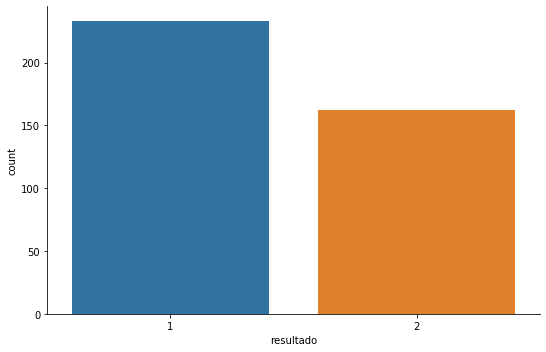

In [158]:
fg = sns.factorplot('N3', data=nota2, kind='count', aspect=1.5)
fg.set_xlabels('resultado')

59% de reprobados

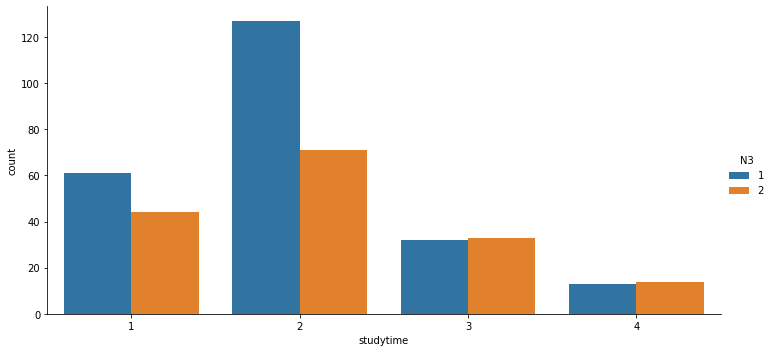

In [122]:
sns.factorplot('studytime', data=nota2, kind='count', hue='N3', order=[1,2,3,4], 
               hue_order=['1','2'], aspect=2)

In [157]:
# resultado de nota final por tiempo de estudio
nota2.groupby(['studytime', 'N3'])['studytime'].count()

studytime  N3
1          1      61
           2      44
2          1     127
           2      71
3          1      32
           2      33
4          1      13
           2      14
Name: studytime, dtype: int64

Para los que estudian 2 hrs hay mayor proporción de reprobados 64%, para el resto de horas de estudio se mantiene cercano al 50 y 50%


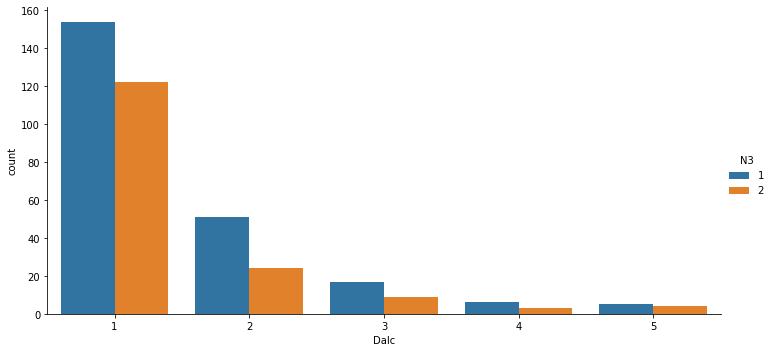

In [98]:
sns.factorplot('Dalc', data=nota2, kind='count', hue='N3', order=[1,2,3,4,5], 
               hue_order=['1','2'], aspect=2)

In [162]:
# resultado de nota final por Workday alcohol consumption
nota2.groupby(['Dalc', 'N3'])['Dalc'].count()

Dalc  N3
1     1     154
      2     122
2     1      51
      2      24
3     1      17
      2       9
4     1       6
      2       3
5     1       5
      2       4
Name: Dalc, dtype: int64

No hay diferencia significativa en la proporción de aprobados y reprobados para los diferentes niveles de consumo de alcohol en días laborales, en general 59% reprobados vs 41% aprobados, se eleva un poco el % de reprobados en el segundo nivel a un 68%

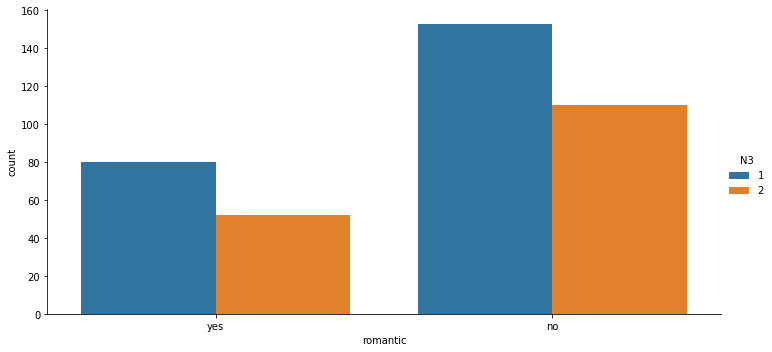

In [115]:
sns.factorplot('romantic', data=nota2, kind='count', hue='N3', order=["yes","no"], 
               hue_order=['1','2'], aspect=2)

In [163]:
# resultado de nota final por romantic relationship
nota2.groupby(['romantic', 'N3'])['romantic'].count()

romantic  N3
no        1     153
          2     110
yes       1      80
          2      52
Name: romantic, dtype: int64

No hay una diferencia significativa con respecto a la proporción de reprobados al tener o no una relación romántica, general 59% de reprobados

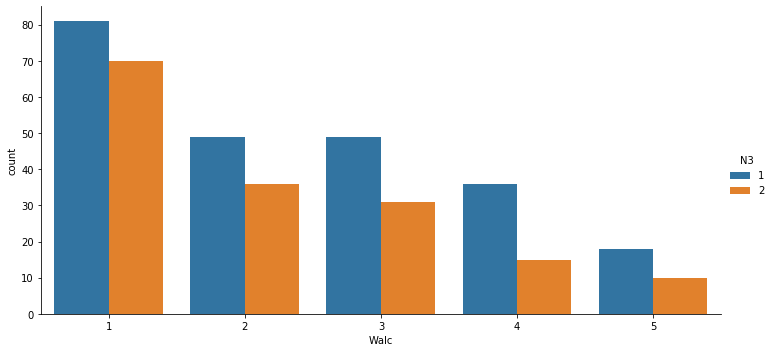

In [116]:
sns.factorplot('Walc', data=nota2, kind='count', hue='N3', order=[1,2,3,4,5], 
               hue_order=['1','2'], aspect=2)

In [165]:
# resultado de nota final por Weekend alcohol consumption
nota2.groupby(['Walc', 'N3'])['Walc'].count()

Walc  N3
1     1     81
      2     70
2     1     49
      2     36
3     1     49
      2     31
4     1     36
      2     15
5     1     18
      2     10
Name: Walc, dtype: int64

Hay un leve aumento en la proporción de reprobados para los jóvenes que tienen un mayor nivel de consumo de alcohol los fines de semana, para el nivel 4 un 71% de reprobados y para el nivel 5 un 65%, vs el promedio de 59%.
La población está mas distribuido entre todos los niveles con respecto a la variable de consumo de alcohol en workday.

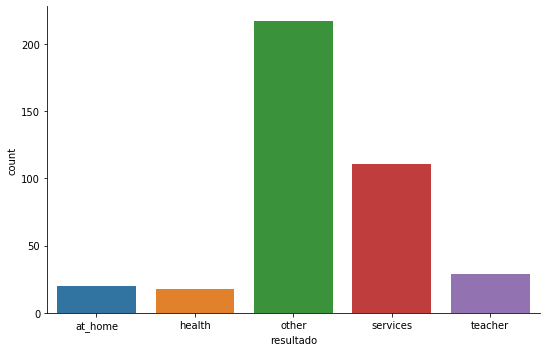

In [78]:
fg = sns.factorplot('Fjob', data=nota2, kind='count', aspect=1.5)
fg.set_xlabels('resultado')

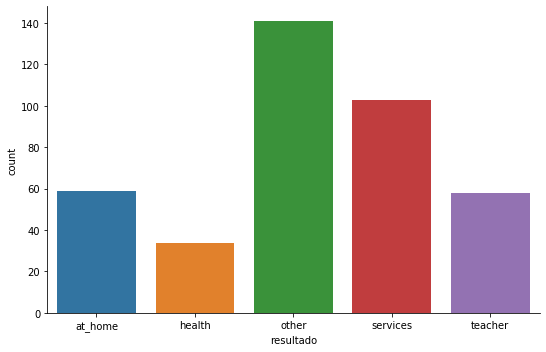

In [166]:
fg = sns.factorplot('Mjob', data=nota2, kind='count', aspect=1.5)
fg.set_xlabels('resultado')

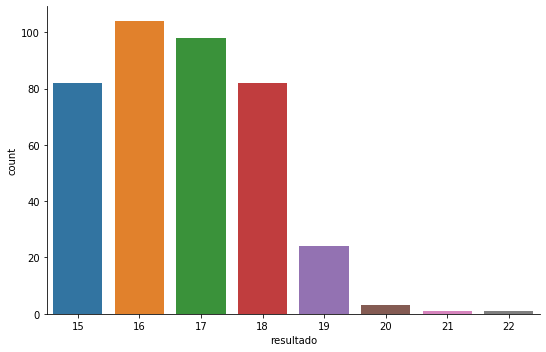

In [79]:
fg = sns.factorplot('age', data=nota2, kind='count', aspect=1.5)
fg.set_xlabels('resultado')

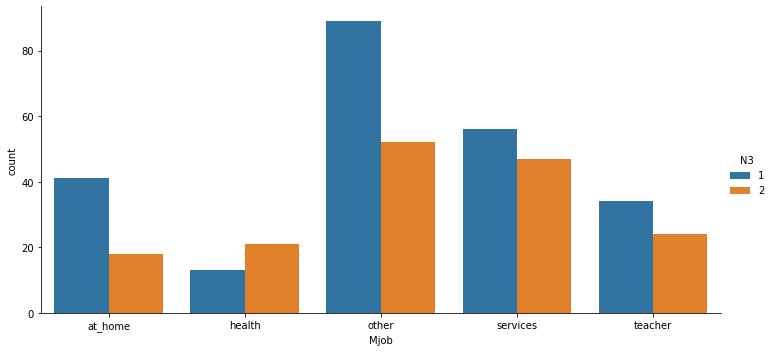

In [169]:
sns.factorplot('Mjob', data=nota2, kind='count', hue='N3', order=["at_home","health","other","services","teacher"], 
               hue_order=['1','2'], aspect=2)

In [171]:
# resultado de nota final por profesión de la madre
nota2.groupby(['Mjob', 'N3'])['Mjob'].count()

Mjob      N3
at_home   1     41
          2     18
health    1     13
          2     21
other     1     89
          2     52
services  1     56
          2     47
teacher   1     34
          2     24
Name: Mjob, dtype: int64

No hay diferencia en la proporción de reprobados, con respecto al promedio, si la profesión de la madre es teacher.

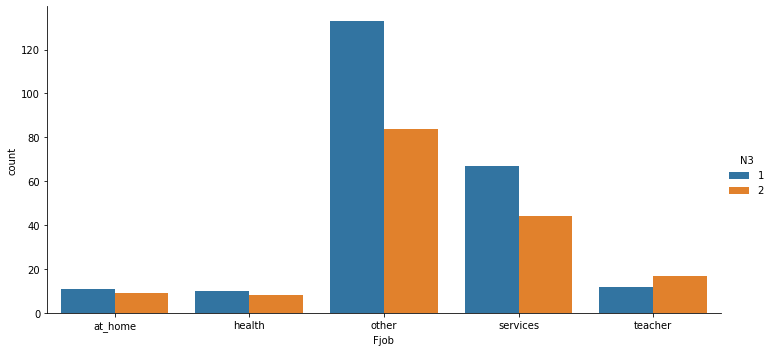

In [170]:
sns.factorplot('Fjob', data=nota2, kind='count', hue='N3', order=["at_home","health","other","services","teacher"], 
               hue_order=['1','2'], aspect=2)

In [172]:
# resultado de nota final por profesión del padre
nota2.groupby(['Fjob', 'N3'])['Fjob'].count()

Fjob      N3
at_home   1      11
          2       9
health    1      10
          2       8
other     1     133
          2      84
services  1      67
          2      44
teacher   1      12
          2      17
Name: Fjob, dtype: int64

Cuando la profesión del padre es tecaher aumenta la proporción de aprobados a un 59% comparado con un 41% del promedio, es un aumento significativo, pero la muestra es pequeña.

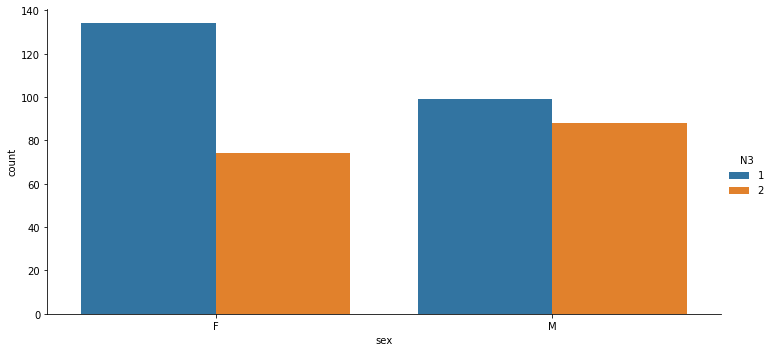

In [173]:
sns.factorplot('sex', data=nota2, kind='count', hue='N3', order=["F","M"], 
               hue_order=['1','2'], aspect=2)

In [174]:
# resultado de nota final por sexo
nota2.groupby(['sex', 'N3'])['sex'].count()

sex  N3
F    1     134
     2      74
M    1      99
     2      88
Name: sex, dtype: int64

Hay una mayor proporción de mujeres que reprueban el curso, un 64% vs los hombres que reprueban en un 51% de los casos.

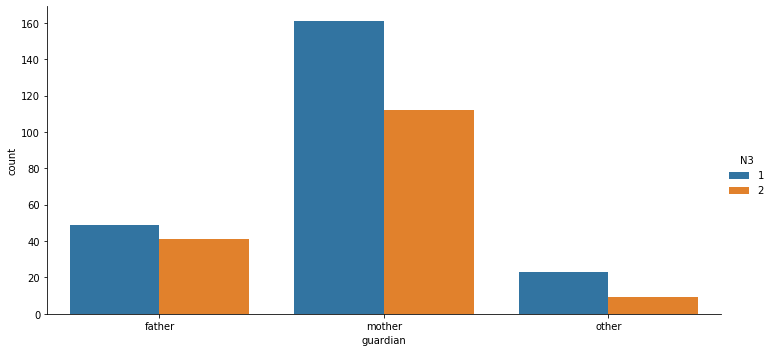

In [175]:
sns.factorplot('guardian', data=nota2, kind='count', hue='N3', order=["father","mother","other"], 
               hue_order=['1','2'], aspect=2)

In [177]:
# resultado de nota final por guardian
nota2.groupby(['guardian', 'N3'])['guardian'].count()

guardian  N3
father    1      49
          2      41
mother    1     161
          2     112
other     1      23
          2       9
Name: guardian, dtype: int64

Hay mayor proporción de reprobados cuando la persona a cargo no es el padre o la madre, un 72%

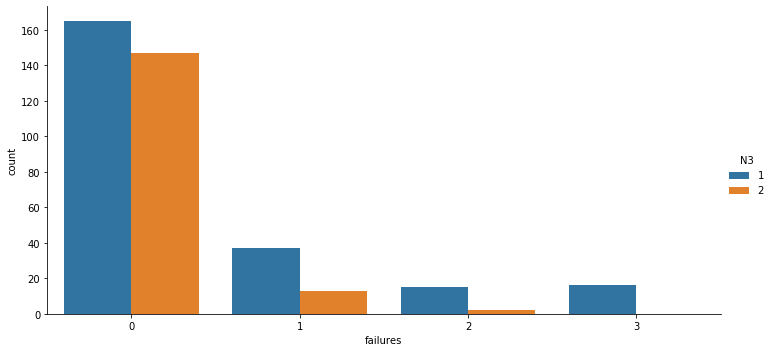

In [178]:
sns.factorplot('failures', data=nota2, kind='count', hue='N3', order=[0,1,2,3], 
               hue_order=['1','2'], aspect=2)

In [179]:
# resultado de nota final por ausencias
nota2.groupby(['failures', 'N3'])['failures'].count()

failures  N3
0         1     165
          2     147
1         1      37
          2      13
2         1      15
          2       2
3         1      16
Name: failures, dtype: int64

El % de reprobados aumenta gradualmente conforme a aumentan las ausencias a clases.

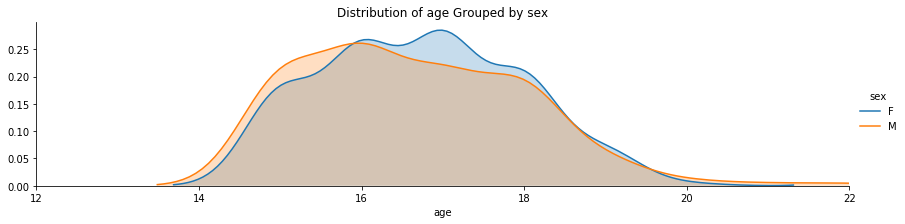

In [188]:
fig = sns.FacetGrid(nota2, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = nota2['age'].max()
fig.set(xlim=(12,oldest))
fig.set(title='Distribution of age Grouped by sex')
fig.add_legend()

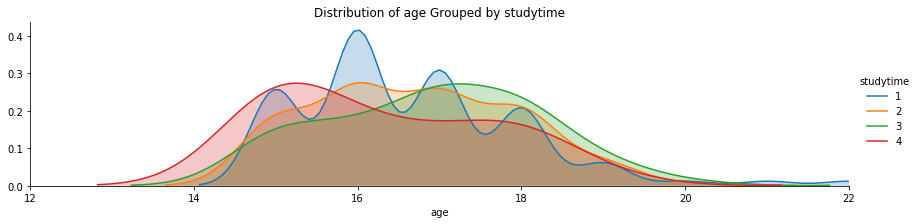

In [189]:
fig = sns.FacetGrid(nota2, hue='studytime', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = nota2['age'].max()
fig.set(xlim=(12,oldest))
fig.set(title='Distribution of age Grouped by studytime')
fig.add_legend()

Los más jóvenes dedican más horas a estudiar

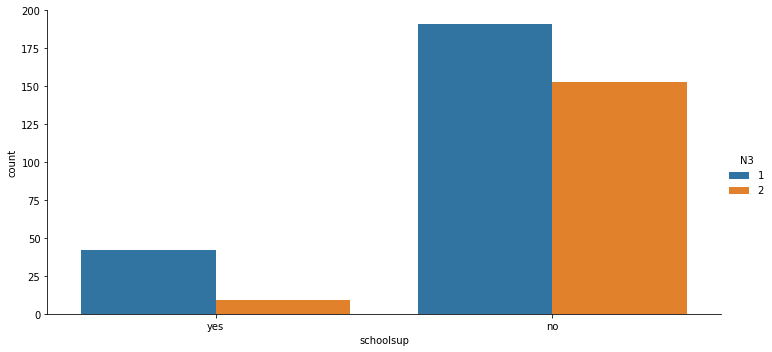

In [243]:
sns.factorplot('schoolsup', data=nota2, kind='count', hue='N3', order=["yes","no"], 
               hue_order=['1','2'], aspect=2)

In [245]:
# resultado de nota final por pago clases extra
nota2.groupby(['schoolsup', 'N3'])['schoolsup'].count()

schoolsup  N3
no         1     191
           2     153
yes        1      42
           2       9
Name: schoolsup, dtype: int64

Las personas que pagaron clases extra tuvieron una mayor proporción de fracaso

DUMMY'S

In [225]:
## Dummy's 
nota['school2']= nota.school.map({'GP':0,'MS':1})
nota['sex2']= nota.sex.map({'F':0,'M':1})
nota['address2']= nota.address.map({'R':0,'U':1})                                   
nota['famsize2']= nota.famsize.map({'GT3':0,'LE3':1})                                   
nota['Pstatus2']= nota.Pstatus.map({'A':0,'T':1})                                   
nota['Mjob2']= nota.Mjob.map({'at_home':0,'health':1,'other':2,'services':3,'teacher':4})                                   
nota['Fjob2']= nota.Fjob.map({'at_home':0,'health':1,'other':2,'services':3,'teacher':4}) 
nota['reason2']= nota.reason.map({'course':0,'other':1,'home':1,'reputation':1})
nota['guardian2']= nota.guardian.map({'mother':0,'father':1,'other':2})                                   
nota['schoolsup2']= nota.schoolsup.map({'yes':0,'no':1})                                   
nota['famsup2']= nota.famsup.map({'yes':0,'no':1})                                   
nota['paid2']= nota.paid.map({'yes':0,'no':1})                                   
nota['activities2']= nota.activities.map({'yes':0,'no':1})
nota['nursery2']= nota.nursery.map({'yes':0,'no':1})                                   
nota['higher2']= nota.higher.map({'yes':0,'no':1})                                   
nota['internet2']= nota.internet.map({'yes':0,'no':1})                                   
nota['romantic2']= nota.romantic.map({'yes':0,'no':1}) 

In [226]:
nota3 = nota.loc[:, ['school2', 'sex2', 'age','address2','famsize2','Pstatus2','Medu','Fedu','Mjob2','Fjob2','reason2','guardian2','traveltime','studytime','failures','schoolsup2','famsup2','paid2','activities2','nursery2','higher2','internet2','romantic2','famrel','freetime','goout','Dalc','Walc','health','absences','N1','N2','N3']]

In [227]:
nota3[:5]

,school2,sex2,age,address2,famsize2,Pstatus2,Medu,Fedu,Mjob2,Fjob2,...,famrel,freetime,goout,Dalc,Walc,health,absences,N1,N2,N3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,1,1,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,1,1,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,1,1,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,2,2,2
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,1,1,1


SELECCIÓN DE CARACTERÍSTICAS

In [228]:
import sklearn as skl
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [230]:
N3 = nota3['N3']
# Aplicando el algoritmo univariante de prueba F.
k = 20  # número de atributos a seleccionar
entrenar = nota3.drop(['N3'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, N3)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['school2',
 'sex2',
 'age',
 'address2',
 'famsize2',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup2',
 'famsup2',
 'higher2',
 'internet2',
 'goout',
 'Dalc',
 'Walc',
 'absences',
 'N1',
 'N2']

In [240]:
from sklearn.ensemble import ExtraTreesClassifier
# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees
modelo = ExtraTreesClassifier()
era = RFE(modelo, 22)  # número de atributos a seleccionar
era = era.fit(entrenar, N3)
# imprimir resultados
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['sex2',
 'age',
 'Medu',
 'Fedu',
 'Mjob2',
 'Fjob2',
 'reason2',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup2',
 'famsup2',
 'nursery2',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'N1',
 'N2']

In [241]:
# Importancia de atributos.
modelo.fit(entrenar, N3)
modelo.feature_importances_[:22]

array([0.00620514, 0.01188074, 0.01651292, 0.0078504 , 0.01010647,
       0.00704167, 0.01630421, 0.01230013, 0.01170633, 0.01143902,
       0.01155521, 0.00788065, 0.0092781 , 0.01522894, 0.01625615,
       0.01228338, 0.00844162, 0.00843142, 0.00886752, 0.0120271 ,
       0.00350792, 0.00729185])

In [246]:
features = nota3.loc[:, ['sex2', 'age', 'Medu','Fedu','Mjob2','Fjob2','reason2','traveltime','studytime','failures','schoolsup2','famsup2','famrel','freetime','goout','Dalc','Walc','health','absences','N1','N2']]

In [248]:
#dependent variable
depVar = nota3['N3']

MODELOS

In [293]:
# Modelos 
modelSVC = SVC(kernel='rbf', C=1) 
modelRF = RandomForestClassifier(n_estimators=2, criterion='gini',) 
modelKN = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 2, weights = 'uniform')

In [251]:
x_train, x_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.3,random_state = 0)

In [262]:
modelSVCfit= modelSVC.fit(x_train, y_train)

In [263]:
modelSVCfit

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [265]:
modelRFfit= modelRF.fit(x_train, y_train)
modelRFfit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [294]:
modelKNfit= modelKN.fit(x_train, y_train)
modelKNfit

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

([<matplotlib.axis.XTick at 0x1c9d5d97708>,
 <a list of 5 Text xticklabel objects>)

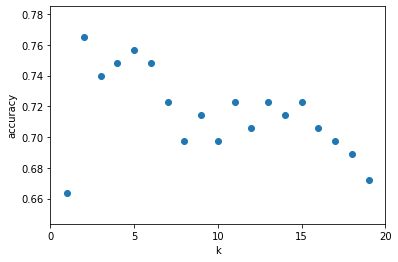

In [258]:
##Elegir el mejor valor de k
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [264]:
print(cross_val_score(modelSVCfit, x_train, y_train))
modelSVCfit.score (x_train, y_train)

[0.76785714 0.74545455 0.81818182 0.72727273 0.74545455]


0.822463768115942

In [267]:
print(cross_val_score(modelRFfit, x_train, y_train))
modelRFfit.score (x_train, y_train)

[0.73214286 0.85454545 0.8        0.92727273 0.89090909]


0.9565217391304348

In [295]:
print(cross_val_score(modelKNfit, x_train, y_train))
modelKNfit.score(x_train, y_train)

[0.67857143 0.56363636 0.65454545 0.63636364 0.70909091]


0.8079710144927537

PREDICCIONES

In [270]:
prediccionSVC = modelSVC.predict(x_test)
accuracy_score(y_test, prediccionSVC)

0.8571428571428571

In [271]:
prediccionRF = modelRF.predict(x_test)
accuracy_score(y_test, prediccionRF)

0.865546218487395

In [272]:
prediccionKN = modelKN.predict(x_test)
accuracy_score(y_test, prediccionKN)

0.7647058823529411

In [273]:
prediccionKN

array(['2', '1', '1', '1', '2', '2', '2', '1', '1', '2', '1', '1', '1',
       '1', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1',
       '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '2',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '1'], dtype=object)

In [276]:
confusion_matrix(y_test, prediccionSVC)

array([[72,  2],
       [15, 30]], dtype=int64)

In [277]:
confusion_matrix(y_test, prediccionRF)

array([[70,  4],
       [12, 33]], dtype=int64)

In [274]:
confusion_matrix(y_test, prediccionKN)

array([[70,  4],
       [24, 21]], dtype=int64)

In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediccionSVC))

              precision    recall  f1-score   support

           1       0.83      0.97      0.89        74
           2       0.94      0.67      0.78        45

    accuracy                           0.86       119
   macro avg       0.88      0.82      0.84       119
weighted avg       0.87      0.86      0.85       119



In [279]:
print(classification_report(y_test, prediccionRF))

              precision    recall  f1-score   support

           1       0.85      0.95      0.90        74
           2       0.89      0.73      0.80        45

    accuracy                           0.87       119
   macro avg       0.87      0.84      0.85       119
weighted avg       0.87      0.87      0.86       119



In [275]:
print(classification_report(y_test, prediccionKN))

              precision    recall  f1-score   support

           1       0.74      0.95      0.83        74
           2       0.84      0.47      0.60        45

    accuracy                           0.76       119
   macro avg       0.79      0.71      0.72       119
weighted avg       0.78      0.76      0.75       119



SELECCIONAR MODELO KN